In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

In [2]:
X = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
Y = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

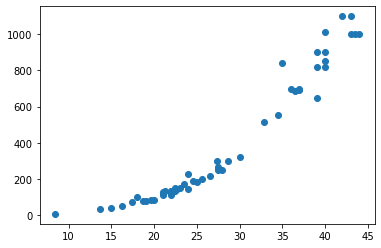

In [3]:
plt.scatter(X, Y)

In [4]:
t_x, tt_x, t_y, tt_y = train_test_split(X, Y, random_state= 43)
print(t_x.shape, tt_x.shape)

(42,) (14,)


In [5]:
t_x

array([34.5, 39. , 43. , 16.2, 39. , 19.6, 22. , 36. , 19. , 40. , 30. ,
       22.5, 26.5, 32.8, 20. , 42. , 25.6, 21. , 27.5, 24. , 21. , 44. ,
       37. , 40. , 37. , 28. , 13.7, 24. , 21. , 28.7, 43.5, 23.5, 27.3,
       39. , 15. , 25. , 22. , 22. , 22.7, 40. ,  8.4, 17.4])

In [6]:
n_t_x = t_x.reshape(-1, 1)
n_tt_x = tt_x.reshape(-1, 1)
print(n_t_x.shape, n_tt_x.shape)

(42, 1) (14, 1)


In [7]:
knr = KNeighborsRegressor()
knr.fit(n_t_x, t_y)

KNeighborsRegressor()

In [8]:
knr.score(n_tt_x, tt_y)

0.9662464614810213

In [9]:
end_tt_y = knr.predict(n_tt_x)

mae = mean_absolute_error(tt_y, end_tt_y)  # 오차 계산
mae

29.69285714285715

In [10]:
knr.score(n_t_x, t_y)  # 훈련 데이터로 점수 계산

0.9815010309553626

In [11]:
knr.n_neighbors = 3
knr.fit(n_t_x, t_y)
knr.score(n_tt_x, tt_y)

0.9625437594582437

In [12]:
knr.score(n_t_x, t_y)  # 모델 변경 후 훈련 데이터로 점수 계산

0.9878266455621827

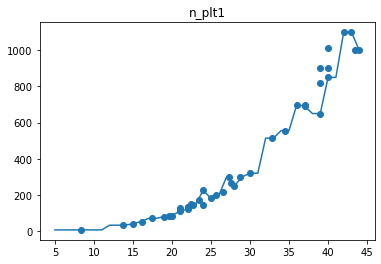

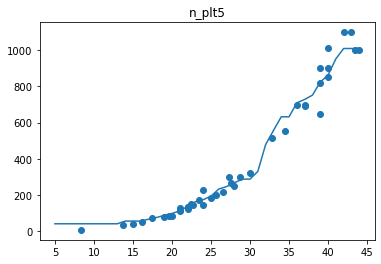

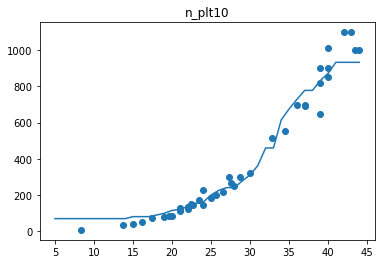

In [13]:
knr1 = KNeighborsRegressor()
x = np.arange(5, 45).reshape(-1, 1)  # 비교를 위한 데이터 생성

for n in [1, 5, 10]:
    knr1.n_neighbors = n
    knr1.fit(n_t_x, t_y)
    p_data = knr1.predict(x)
    plt.scatter(n_t_x, t_y)
    plt.plot(x, p_data)
    plt.title(f'n_plt{n}')
    plt.show()

### K회귀의 한계

In [14]:
knr2 = KNeighborsRegressor(n_neighbors= 3)
knr2.fit(n_t_x, t_y)
knr2.predict([[50]])

array([1033.33333333])

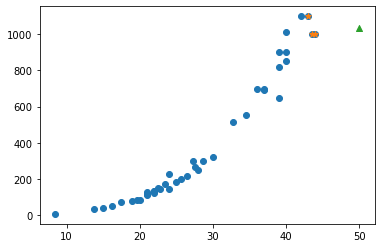

In [16]:
d, i = knr2.kneighbors([[50]])
plt.scatter(n_t_x, t_y)
plt.scatter(n_t_x[i], t_y[i], marker= '*')
plt.scatter(50, 1033.3, marker= '^')

# 학습했던 데이터의 범위를 벗어나면 결과값을 추측하지 못함

In [17]:
knr2.predict([[1000]])  # x값을 학습한 데이터보다 아주 큰 값을 주면 문제가 확실히 보임

array([1033.33333333])

### 선형회귀

In [20]:
lr = LinearRegression().fit(n_t_x, t_y)

In [21]:
print(lr.predict([[50]]))
print(lr.predict([[1000]]))

[1187.92199858]
[35638.66987063]


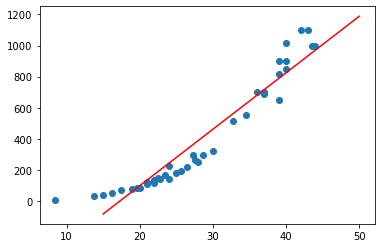

In [23]:
plt.scatter(n_t_x, t_y)
plt.plot([15, 50], [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_], c= 'r')  # 선형회귀를 통해 만들어낸 직선 그리기

### 다항식

In [27]:
p_t_x = np.column_stack((n_t_x ** 2, n_t_x))
p_tt_x = np.column_stack((n_tt_x ** 2, n_tt_x))

In [28]:
lr = LinearRegression()
lr.fit(p_t_x, t_y)

print(lr.predict([[50 ** 2, 50]]))

[1573.06792794]


In [29]:
print(lr.coef_, lr.intercept_)  # w2, w1, w0 출력

[  1.05682431 -24.53340579] 157.67745303390137


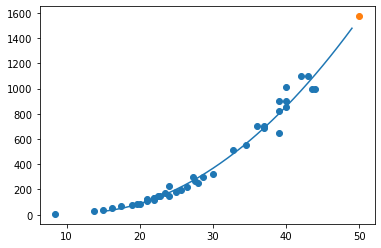

In [30]:
p = np.arange(15, 50)
plt.scatter(n_t_x, t_y)
plt.plot(p, (1.05 * p ** 2) - (24.5 * p) + 157.6)
plt.scatter([50], [1573.06])